In [1]:
import pandas as pd
import requests
from pprint import pprint
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

# import census
from census import Census
from us import states
# Census API Key
from config import api_key

In [ ]:
# carl's code

# Read in the individual bike files, append a new column for month
m_df1 = pd.read_csv("resources/Minneapolis/201804-niceride-tripdata.csv")
m_df1["Month"] = "April"
m_df2 = pd.read_csv("resources/Minneapolis/201805-niceride-tripdata.csv")
m_df2["Month"] = "May"
m_df3 = pd.read_csv("resources/Minneapolis/201806-niceride-tripdata.csv")
m_df3["Month"] = "June"
m_df4 = pd.read_csv("resources/Minneapolis/201807-niceride-tripdata.csv")
m_df4["Month"] = "July"
m_df5 = pd.read_csv("resources/Minneapolis/201808-niceride-tripdata.csv")
m_df5["Month"] = "August"
m_df6 = pd.read_csv("resources/Minneapolis/201809-niceride-tripdata.csv")
m_df6["Month"] = "September"
m_df7 = pd.read_csv("resources/Minneapolis/201810-niceride-tripdata.csv")
m_df7["Month"] = "October"
m_df8 = pd.read_csv("resources/Minneapolis/201811-niceride-tripdata.csv")
m_df8["Month"] = "November"

# create a new data frame and append individual data frames together
m_df = pd.DataFrame()
m_df = m_df1.append(m_df2).append(m_df3).append(m_df4).append(m_df5).append(m_df6).append(m_df7).append(m_df8)
m_df.to_csv('census_output/m_bike.csv')
# m_df.tail()

In [ ]:
# Read in the individual bike files, append a new column for month
b_df1 = pd.read_csv("resources/Boston/201801_hubway_tripdata.csv")
b_df1["Month"] = "January"
b_df2 = pd.read_csv("resources/Boston/201802_hubway_tripdata.csv")
b_df2["Month"] = "February"
b_df3 = pd.read_csv("resources/Boston/201803_hubway_tripdata.csv")
b_df3["Month"] = "March"
b_df4 = pd.read_csv("resources/Boston/201804-hubway-tripdata.csv")
b_df4["Month"] = "April"
b_df5 = pd.read_csv("resources/Boston/201805-bluebikes-tripdata.csv")
b_df5["Month"] = "May"
b_df6 = pd.read_csv("resources/Boston/201806-bluebikes-tripdata.csv")
b_df6["Month"] = "June"
b_df7 = pd.read_csv("resources/Boston/201807-bluebikes-tripdata.csv")
b_df7["Month"] = "July"
b_df8 = pd.read_csv("resources/Boston/201808-bluebikes-tripdata.csv")
b_df8["Month"] = "August"
b_df9 = pd.read_csv("resources/Boston/201809-bluebikes-tripdata.csv")
b_df9["Month"] = "September"
b_df10 = pd.read_csv("resources/Boston/201810-bluebikes-tripdata.csv")
b_df10["Month"] = "October"
b_df11 = pd.read_csv("resources/Boston/201811-bluebikes-tripdata.csv")
b_df11["Month"] = "November"
b_df12 = pd.read_csv("resources/Boston/201812-bluebikes-tripdata.csv")
b_df12["Month"] = "December"

# create a new data frame and append individual data frames together
b_df = pd.DataFrame()
b_df = b_df1.append(b_df2).append(b_df3).append(b_df4).append(b_df5).append(b_df6).append(b_df7).append(b_df8).append(b_df9).append(b_df10).append(b_df11).append(b_df12)
b_df.to_csv('census_output/b_bike.csv')
b_df.head()

In [ ]:
p_df1 = pd.read_csv("resources/Portland/2018_01.csv")
p_df1["Month"] = "January"
p_df2 = pd.read_csv("resources/Portland/2018_01.csv")
p_df2["Month"] = "February"
p_df3 = pd.read_csv("resources/Portland/2018_01.csv")
p_df3["Month"] = "March"
p_df4 = pd.read_csv("resources/Portland/2018_01.csv")
p_df4["Month"] = "April"
p_df5 = pd.read_csv("resources/Portland/2018_01.csv")
p_df5["Month"] = "May"
p_df6 = pd.read_csv("resources/Portland/2018_01.csv")
p_df6["Month"] = "June"
p_df7 = pd.read_csv("resources/Portland/2018_01.csv")
p_df7["Month"] = "July"
p_df8 = pd.read_csv("resources/Portland/2018_01.csv")
p_df8["Month"] = "August"
p_df9 = pd.read_csv("resources/Portland/2018_01.csv")
p_df9["Month"] = "September"
p_df10 = pd.read_csv("resources/Portland/2018_01.csv")
p_df10["Month"] = "October"
p_df11 = pd.read_csv("resources/Portland/2018_01.csv")
p_df11["Month"] = "November"
p_df12 = pd.read_csv("resources/Portland/2018_01.csv")
p_df12["Month"] = "December"

# create a new data frame and append individual data frames together
p_df = pd.DataFrame()
p_df = p_df1.append(p_df2).append(p_df3).append(p_df4).append(p_df5).append(p_df6).append(p_df7).append(p_df8).append(p_df9).append(p_df10).append(p_df11).append(p_df12)
p_df.to_csv('census_output/p_bike.csv')
p_df.tail()

In [ ]:
# # Start bringing in census data. We want the data per census tract of the counties that contain Minneapolis, Boston and Portland

# Get census data for Minneapolis
c = Census(api_key, year=2017)
m_census_data = c.acs5.get(('NAME','B01003_001E', 'B19013_001E', 'B17001_002E', 'B08301_001E', 'B08301_003E', 'B08101_041E',), geo={'for': 'tract:*',
                       'in': 'state:{} county:053'.format(states.MN.fips)}) #  county:053 is Hennepin County
# Convert to DataFrame
m_census_pd = pd.DataFrame(m_census_data)

# Column Renaming
m_census_pd = m_census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B17001_002E": "Poverty count",
                                      "B08301_001E": "Commuting count",
                                      "B08301_003E": "Commuting by car count",
                                      "B08101_041E": "Commuting OTHER count",
                                      "NAME": "Name", "tract": "Census Tract"})

# Add in Poverty Rate (Poverty Count / Population)
m_census_pd["Poverty Rate"] = 100 * \
    m_census_pd["Poverty count"].astype(
        int) / m_census_pd["Population"].astype(int)

# Calculate commute by car
m_census_pd["Car Rate"] = 100 * \
    m_census_pd["Commuting by car count"].astype(
        int) / m_census_pd["Commuting count"].astype(int)

# Calculate commute by OTHER
m_census_pd["Commute OTHER rate"] = 100 * \
    m_census_pd["Commuting OTHER count"].astype(
        int) / m_census_pd["Commuting count"].astype(int)

# Calculate GEOID <= this is used to join to census geography
m_census_pd["GEOID"] = m_census_pd["state"].astype(str)+m_census_pd["county"]+m_census_pd["Census Tract"]
# m_census_pd.head()

In [ ]:
# Get census data for Boston
b_census_data = c.acs5.get(('NAME','B01003_001E', 'B19013_001E', 'B17001_002E', 'B08301_001E', 'B08301_003E', 'B08101_041E',), geo={'for': 'tract:*',
                       'in': 'state:{} county:025'.format(states.MA.fips)}) #  county:025 is Suffolk County

# Convert to DataFrame
b_census_pd = pd.DataFrame(b_census_data)

# Column Reordering
b_census_pd = b_census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B17001_002E": "Poverty count",
                                      "B08301_001E": "Commuting count",
                                      "B08301_003E": "Commuting by car count",
                                      "B08101_041E": "Commuting OTHER count",
                                      "NAME": "Name", "tract": "Census Tract"})

# Add in Poverty Rate (Poverty Count / Population)
b_census_pd["Poverty Rate"] = 100 * \
    b_census_pd["Poverty count"].astype(
        int) / b_census_pd["Population"].astype(int)

# Calculate commute by car)
b_census_pd["Car Rate"] = 100 * \
    b_census_pd["Commuting by car count"].astype(
        int) / b_census_pd["Commuting count"].astype(int)

# Calculate commute by OTHER
b_census_pd["Commute OTHER rate"] = 100 * \
    b_census_pd["Commuting OTHER count"].astype(
        int) / b_census_pd["Commuting count"].astype(int)

# Calculate GEOID <= this is used to join to census geography
b_census_pd["GEOID"] = b_census_pd["state"].astype(str)+b_census_pd["county"]+b_census_pd["Census Tract"]
# b_census_pd.head()

In [ ]:
# Get census data for Portland
# needed to pull several counties because Portland is in 3 different counties
p_census_data = c.acs5.get(('NAME','B01003_001E', 'B19013_001E', 'B17001_002E', 'B08301_001E', 'B08301_003E', 'B08101_041E',), geo={'for': 'tract:*',
                       'in': 'state:{} county:051,067,005'.format(states.OR.fips)}) # counties 051,067,005 are Multnomah, Washington, Clackamas

# Convert to DataFrame
p_census_pd = pd.DataFrame(p_census_data)

# Column Reordering
p_census_pd = p_census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B17001_002E": "Poverty count",
                                      "B08301_001E": "Commuting count",
                                      "B08301_003E": "Commuting by car count",
                                      "B08101_041E": "Commuting OTHER count",
                                      "NAME": "Name", "tract": "Census Tract"})

# Add in Poverty Rate (Poverty Count / Population)
p_census_pd["Poverty Rate"] = 100 * \
    p_census_pd["Poverty count"].astype(
        int) / p_census_pd["Population"].astype(int)

# Calculate commute by car)
p_census_pd["Car Rate"] = 100 * \
    p_census_pd["Commuting by car count"].astype(
        int) / p_census_pd["Commuting count"].astype(int)

# Calculate commute by OTHER
p_census_pd["Commute OTHER rate"] = 100 * \
    p_census_pd["Commuting OTHER count"].astype(
        int) / p_census_pd["Commuting count"].astype(int)

# Calculate GEOID <= this is used to join to census geography
p_census_pd["GEOID"] = p_census_pd["state"].astype(str)+p_census_pd["county"]+p_census_pd["Census Tract"]
# p_census_pd.tail()

In [ ]:
# # find the lowest median household income tracts and highest poverty tracts

# <<<<<<< Minneapolis >>>>>>>
# Sort by median household income, export low 25 to new df, create new column indicating if it is a low 25 census tract
m_census_pd = m_census_pd.sort_values("Median Household Income", ascending=True)
m_mhi_25 = m_census_pd.head(25)
m_census_pd["MHI_25"] = np.where(m_census_pd['Median Household Income']<=m_mhi_25["Median Household Income"].max(), 'yes', 'no')

# Sort by poverty rate, export top 25 to new df, create new column indicating if it is a top 25 tract for poverty rate
m_census_pd = m_census_pd.sort_values("Poverty Rate", ascending=False)
m_pvt_25 = m_census_pd.head(25)
m_census_pd["PVT_25"] = np.where(m_census_pd['Poverty Rate']>=m_pvt_25["Poverty Rate"].min(), 'yes', 'no')

# <<<<<<< Boston >>>>>>>
# Sort by median household income, export low 25 to new df, create new column indicating if it is a low 25 census tract
b_census_pd = b_census_pd.sort_values("Median Household Income", ascending=True)
b_mhi_25 = b_census_pd.head(25)
b_census_pd["MHI_25"] = np.where(b_census_pd['Median Household Income']<=b_mhi_25["Median Household Income"].max(), 'yes', 'no')

# Sort by poverty rate, export top 25 to new df, create new column indicating if it is a top 25 tract for poverty rate
b_census_pd = b_census_pd.sort_values("Poverty Rate", ascending=False)
b_pvt_25 = b_census_pd.head(25)
b_census_pd["PVT_25"] = np.where(b_census_pd['Poverty Rate']>=b_pvt_25["Poverty Rate"].min(), 'yes', 'no')

# <<<<<<< Portland >>>>>>>
# Portland -  Sort by median household income, export low 25 to new df, create new column indicating if it is a low 25 census tract
p_census_pd = p_census_pd.sort_values("Median Household Income", ascending=True)
p_mhi_25 = p_census_pd.head(25)
p_census_pd["MHI_25"] = np.where(p_census_pd['Median Household Income']<=b_mhi_25["Median Household Income"].max(), 'yes', 'no')

# Sort by poverty rate, export top 25 to new df, create new column indicating if it is a top 25 tract for poverty rate
p_census_pd = p_census_pd.sort_values("Poverty Rate", ascending=False)
p_pvt_25 = p_census_pd.head(25)
p_census_pd["PVT_25"] = np.where(p_census_pd['Poverty Rate']>=b_pvt_25["Poverty Rate"].min(), 'yes', 'no')

# export the new data frames to csv, to be read in by our geopandas python file
m_census_pd.to_csv('census_output/m_census_25.csv')
b_census_pd.to_csv('census_output/b_census_25.csv')
p_census_pd.to_csv('census_output/p_census_25.csv')

In [ ]:
# # ===========================================
# # need to go and run geo_merge_census.py 
# # this will read in our x_census_25 tables, and join them to a census shapefile for each city
# # then it will join bike ride data to census tracts based on start locations
# # ===========================================

In [3]:
# # Read in csv of spatially joined census and bike data (these are HUGE)
m_census_bike = pd.read_csv('output/m_sjoin.csv', index_col=0)
b_census_bike = pd.read_csv('output/b_sjoin.csv', index_col=0)
p_census_bike = pd.read_csv('output/p_sjoin.csv', index_col=0)

C:\Users\Carl\.conda\envs\PythonData\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\Carl\.conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


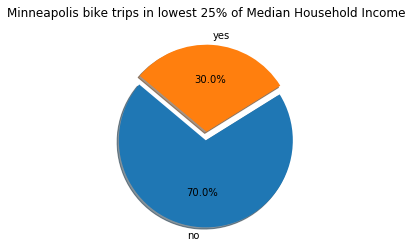

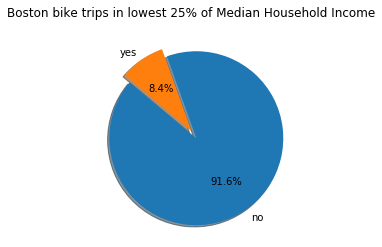

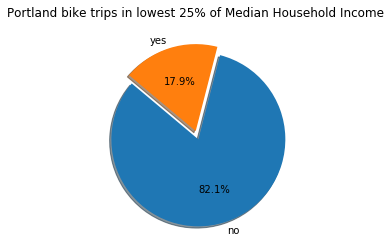

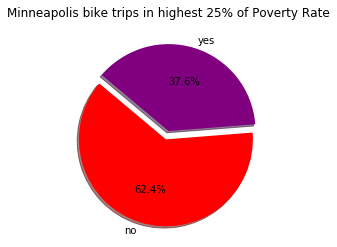

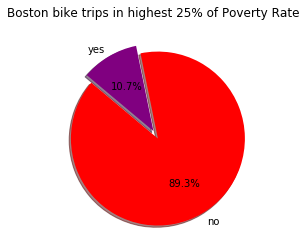

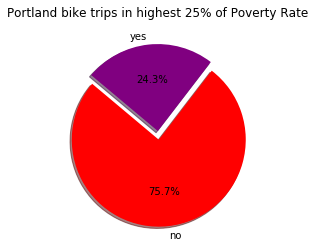

<Figure size 432x288 with 0 Axes>

In [4]:
# # Create pie charts to show how many rides are occuring in lowest 25% or median household income

# Extract a subset of the data frames containing only the fields that we care about
m_census_bike_sub = m_census_bike[["GEOID", "Population", "Median Household Income", "Poverty Rate", "MHI_25", "PVT_25", "start station name"]]
b_census_bike_sub = b_census_bike[["GEOID", "Population", "Median Household Income", "Poverty Rate", "MHI_25", "PVT_25", "start station name"]]
# need to remove rows with missing data
b_census_bike_sub = b_census_bike_sub[b_census_bike_sub["Median Household Income"] != -666666666]
p_census_bike_sub = p_census_bike[["GEOID", "Population", "Median Household Income", "Poverty Rate", "MHI_25", "PVT_25", "StartHub"]]
p_census_bike_sub = p_census_bike_sub[p_census_bike_sub["Median Household Income"] != -666666666]

# Create a function to create pie charts for MHI
def piechart_mhi(df_subset, city):
    # Find out how trips are in each group
    mhi_groups = df_subset.groupby('MHI_25')
    # # Chart our data, give it a title
    explode = (.1, 0)
    mhi_chart = mhi_groups['MHI_25'].count().plot(kind="pie", title=(f"{city} bike trips in lowest 25% of Median Household Income"),
                                               autopct="%1.1f%%", explode = explode, startangle=140, shadow=True,)
    mhi_chart.set_xlabel("")
    mhi_chart.set_ylabel("")
    plt.savefig(f'Images/{city}_MHI.png')
    plt.show()
    plt.tight_layout()
    
# Create a function to create pie charts for Poverty Rate
def piechart_pvt(df_subset, city):
    # Find out how trips are in each group
    pvt_groups = df_subset.groupby('PVT_25')
    # # Chart our data, give it a title
    explode = (.1, 0)
    pvt_chart = pvt_groups['PVT_25'].count().plot(kind="pie", title=(f"{city} bike trips in highest 25% of Poverty Rate"),
                                               autopct="%1.1f%%", colors = ['red', 'purple'], explode = explode, startangle=140, shadow=True,)
    pvt_chart.set_xlabel("")
    pvt_chart.set_ylabel("")
    plt.savefig(f'Images/{city}_PVT.png')
    plt.show()
    plt.tight_layout()

# run functions
piechart_mhi(m_census_bike_sub, "Minneapolis")
piechart_mhi(b_census_bike_sub, "Boston")
piechart_mhi(p_census_bike_sub, "Portland")
piechart_pvt(m_census_bike_sub, "Minneapolis")
piechart_pvt(b_census_bike_sub, "Boston")
piechart_pvt(p_census_bike_sub, "Portland")

The r-squared is: -0.010342502738792694


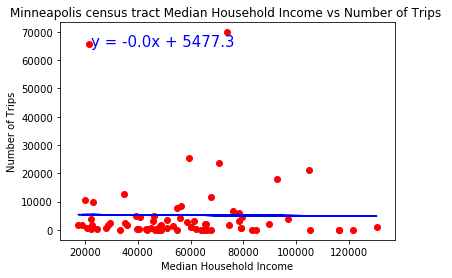

The r-squared is: 0.28845154131829437


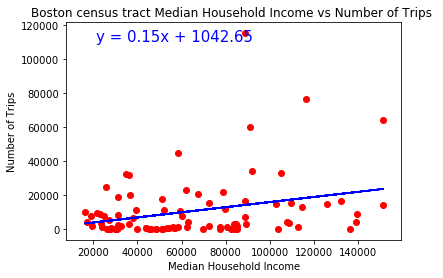

The r-squared is: -0.43017099537257414


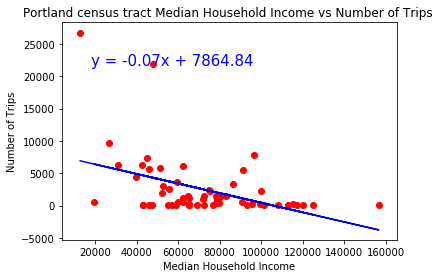

In [5]:
# # Run correlation between bike rides and median household income

# Create a function to create pie charts for MHI
def linregress(df_subset, city):
    # Find out how many trips are in each census tract
    geoid_grouped = df_subset.groupby(['GEOID'])
    tract_mhi = geoid_grouped['Median Household Income'].mean()
    tract_trips = geoid_grouped['Median Household Income'].count()
    # perform linear regression and calculate regress values
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(tract_mhi, tract_trips)
    regress_values = tract_mhi * slope + intercept
    # Create the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot the x and y columns, annotate the line equation
    plt.plot(tract_mhi,regress_values,"b-")
    plt.annotate(line_eq,(tract_mhi.min() + 5000,tract_trips.max() -5000),fontsize=15,color="blue")
    plt.scatter( tract_mhi, tract_trips, marker="o", color="red")
    plt.title(f"{city} census tract Median Household Income vs Number of Trips ")
    plt.xlabel("Median Household Income")
    plt.ylabel("Number of Trips")
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f'Images/{city}_linregress.png')
    plt.show()

linregress(m_census_bike_sub, "Minneapolis")
linregress(b_census_bike_sub, "Boston")
linregress(p_census_bike_sub, "Portland")


In [13]:
# # test null hypothesis on whehter high income areas ride bike shares more often or not
# Extract individual groups
m_geoid_grouped = m_census_bike_sub.groupby(['GEOID'])
b_geoid_grouped = b_census_bike_sub.groupby(['GEOID'])
p_geoid_grouped = p_census_bike_sub.groupby(['GEOID'])


# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
def ttest(dataset1, dataset2, name1, name2):
    test = st.ttest_ind(dataset1['Median Household Income'].mean(), 
             dataset2['Median Household Income'].mean(),
             equal_var=False)
    return print(f"{name1} and {name2} dataset pvalue:{round(test[1], 5)}" )
ttest(m_geoid_grouped, b_geoid_grouped, "Minneapolis", "Boston" )
ttest(m_geoid_grouped, p_geoid_grouped, "Minneapolis", "Portland" )
ttest(b_geoid_grouped, p_geoid_grouped, "Boston", "Portland" )


Minneapolis and Boston dataset pvalue:0.1729
Minneapolis and Portland dataset pvalue:0.00401
Boston and Portland dataset pvalue:0.15133


In [15]:
m_geoid_grouped.head()

,GEOID,Population,Median Household Income,Poverty Rate,MHI_25,PVT_25,start station name
0,27053110000,2010.0,62109.0,33.034826,no,yes,E 38th Street & 3rd Ave S
0,27053110000,2010.0,62109.0,33.034826,no,yes,E 38th Street & 3rd Ave S
0,27053110000,2010.0,62109.0,33.034826,no,yes,E 38th Street & 3rd Ave S
0,27053110000,2010.0,62109.0,33.034826,no,yes,E 38th Street & 3rd Ave S
0,27053110000,2010.0,62109.0,33.034826,no,yes,E 38th Street & 3rd Ave S
...,...,...,...,...,...,...,...
113,27053105201,2991.0,56483.0,14.108994,no,no,Loring Park
113,27053105201,2991.0,56483.0,14.108994,no,no,Loring Park
113,27053105201,2991.0,56483.0,14.108994,no,no,Loring Park
113,27053105201,2991.0,56483.0,14.108994,no,no,Loring Park


In [ ]:
# ===================================================
# End of Census vs bike (Carl's) code
# ===================================================

In [ ]:
# paul's code

In [ ]:
print("Snow Emergency.")

In [ ]:
# MICAH'S CODE SECTION 

# =================================================================================================
# IDENTIFYING AND CLEANING OUR INDIVIDUAL CITY BIKE SHARE DATAFRAMES FOR OUR DATES FROM CARL'S CODE
# =================================================================================================

# PORTLAND 'BIKETOWN' BIKE SHARE INFORMATION DATAFRAME FOR 2018 ----------------------------------
# SELECTING DESIRED COLUMNS - MONTH : 'Month', DISTANCE : 'Distance_Miles', USER TYPE : 'PaymentPlan', 
# TRIP DURATION : 'Duration' AND START DATE : 'StartDate'
p_df_desired = p_df[["Month", "Distance_Miles", "PaymentPlan", "Duration", "StartDate"]]

# CLEANING DATAFRAME COLUMN NAMES FOR PORTLAND BIKE SHARE INFORMATION
p_df_clean_m = p_df_desired.rename(columns = {"Distance_Miles": "Distance Traveled (mi)",
                                              "PaymentPlan": "User Type",
                                              "Duration" : "Trip Duration",
                                              "StartDate" : "Trip Date"})

# MINNEAPOLIS 'NICERIDE' BIKE SHARE INFORMATION DATAFRAME FOR 2018 ------------------------------
# SELECTING DESIRED COLUMNS - MONTH : 'Month', USER TYPE : 'usertype', GENDER : 'gender', TRIP DURATION : 'tripduration'
# AND START DATE : 'start_time'
m_df_desired = m_df[["Month", "usertype", "gender", "tripduration", "start_time"]]

# CLEANING DATAFRAME COLUMN NAMES FOR MINNEAPOLIS BIKE SHARE INFORMATION
m_df_clean_m = m_df_desired.rename(columns = {"usertype": "User Type",
                                              "gender": "User Gender",
                                              "tripduration" : "Trip Duration",
                                              "start_time" : "Trip Date"})

# BOSTON 'BLUEBIKES' BIKE SHARE INFORMATION DATAFRAME FOR 2018 ----------------------------------
# SELECTING DESIRED COLUMNS - MONTH : 'Month', USER TYPE : 'usertype', GENDER : 'gender', TRIP DURATION : 'tripduration'
# AND START DATE : 'starttime'
b_df_desired = b_df[["Month", "usertype", "gender", "tripduration", "starttime"]]

# CLEANING DATAFRAME COLUMN NAMES FOR BOSTON BIKE SHARE INFORMATION
b_df_clean_m = b_df_desired.rename(columns = {"usertype": "User Type",
                                              "gender": "User Gender",
                                              "tripduration" : "Trip Duration",
                                              "starttime" : "Trip Date"})


In [ ]:
p_df_clean_m.head()

In [ ]:
m_df_clean_m.head()

In [ ]:
b_df_clean_m.head()

In [ ]:
# =================================================================================================
# GETTING HISTORICAL WEATHER DATA FROM 01 JANUARY 2018 THROUGH 31 DECEMBER 2018 (OBTAINED THROUGH NOAA)
# =================================================================================================

# READING IN .CSV FILE CALLED 'Weather-Data.csv'
weather_data_df = pd.read_csv("resources/Weather-Data.csv")

weather_data_df

# CLEANING DATAFRAME COLUMN NAMES
weather_data_df = weather_data_df.rename( columns = {'AWND' : 'Average Wind Speed',
                                                     'NAME' : 'Name',
                                                     'DATE' : 'Date',
                                                     'MDPR' : 'Multiday Precipitation Total',
                                                     'PGTM' : 'Peak Gust Time',
                                                     'PRCP' : 'Precipitation',
                                                     'PSUN' : 'Daily Percent of Possible Sunshine',
                                                     'SNOW' : 'Snowfall',
                                                     'SNWD' : 'Snow Depth',
                                                     'TAVG' : 'Average Temperature',
                                                     'TMAX' : 'Maximum Temperature',
                                                     'TMIN' : 'Minimum Temperature',
                                                     'TOBS' : 'Temperature at Time of Observation',
                                                     'TSUN' : 'Total Sunshine',
                                                     'WDMV' : 'Total Wind Movement',
                                                     'WT01' : 'Fog, Ice Fog, or Freezing Fog',
                                                     'WT02' : 'Heavy Fog or Heaving Freezing Fog',
                                                     'WT03' : 'Thunder',
                                                     'WT04' : 'Ice pellets, Sleet, Snow Pellets, or Small Hail',
                                                     'WT05' : 'Hail',
                                                     'WT08' : 'Smoke or Haze',
                                                     'WT09' : 'Blowing or Drifting Snow',
                                                     'WT11' : 'High or Damaging Winds'})

# FILLING NAN VALUES WITH ZEROS
weather_data_df_cleaned = weather_data_df.fillna(0)

# SELECTING ONLY COLUMNS WE WANT AND HAVE CLEANED
weather_data_df_cleansed = weather_data_df_cleaned[["Name",
                                                    "Date",
                                                    "Average Wind Speed",
                                                    "Multiday Precipitation Total",
                                                    "Peak Gust Time",
                                                    "Precipitation",
                                                    "Daily Percent of Possible Sunshine",
                                                    "Snowfall",
                                                    "Snow Depth",
                                                    "Average Temperature",
                                                    "Maximum Temperature",
                                                    "Minimum Temperature",
                                                    "Temperature at Time of Observation",
                                                    "Total Sunshine",
                                                    "Total Wind Movement",
                                                    "Fog, Ice Fog, or Freezing Fog",
                                                    "Heavy Fog or Heaving Freezing Fog",
                                                    "Thunder",
                                                    "Ice pellets, Sleet, Snow Pellets, or Small Hail",
                                                    "Hail",
                                                    "Smoke or Haze",
                                                    "Blowing or Drifting Snow",
                                                    "High or Damaging Winds"]]


In [ ]:
weather_data_df_cleansed.head()